# Hip-hop vs Pop: a change in the music trend of the past 2 decades
By Louie Cai. The dataset is organized by [Daniel DeFoe from Kaggle](https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019).

In [1]:
# package imports
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
billboard = pd.read_csv("./billboardHot100_1999-2019.csv") # import data
billboard

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97220,97221,Vitamin C,Smile,95,NaN,NaN,1999-07-12,NaN,"Jamaica,Pop","Colleen fitzpatrick, Josh deutsch","Smile \nHahaha\nAlright, yeah\nAlright\nFirst ...",Lady Saw
97221,97222,Collective Soul,Heavy,96,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",Collective soul,Heavy \nComplicate this world you wrapped for ...,NaN
97222,97223,Mary Chapin Carpenter,Almost Home,97,NaN,NaN,1999-07-12,NaN,"Country,Pop","Annie roboff, Beth nielsen chapman, Mary chapi...",Almost Home \nI saw my life this morning\nLyin...,NaN
97223,97224,Q,Vivrant Thing,98,NaN,NaN,1999-07-12,NaN,Rap,"Q tip, J dilla, Barry white",Vivrant Thing \nUh check it out now\nUh no dou...,NaN


## Data clean-up
We remove the unnecessary columns and split the date column into three different columns of `int`s.

In [3]:
def date(input_date: str, part: str) -> int:
    """
    Extract a single part of the input date and return it.
    :param input_date: date to be extracted
    :param part: which part to return (year, month, or day)
    :return: the part of the date
    """
    if part == "year":
        return int(input_date.split("-")[0])
    elif part == "month":
        return int(input_date.split("-")[1])
    elif part == "day":
        return int(input_date.split("-")[2])

In [4]:
clean_billboard = billboard.drop(columns=["Unnamed: 0",  "Writing.Credits", "Lyrics", "Features", "Date", "Week", "Weeks.on.chart"]).assign(
    Year=billboard.get("Week").apply(date, args=("year",))).assign(
    Month=billboard.get("Week").apply(date, args=("month",))).assign(
    Day=billboard.get("Week").apply(date, args=("day",)))

clean_billboard

,Artists,Name,Weekly.rank,Peak.position,Genre,Year,Month,Day
0,"Lil Nas,",Old Town Road,1,1.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...",2019,7,6
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,Pop,2019,7,6
2,Billie Eilish,Bad Guy,3,2.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",2019,7,6
3,Khalid,Talk,4,3.0,"Synth-Pop,Pop",2019,7,6
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,"Canada,UK,Dance,Dance-Pop,Pop",2019,7,6
...,...,...,...,...,...,...,...,...
97220,Vitamin C,Smile,95,NaN,"Jamaica,Pop",1999,7,12
97221,Collective Soul,Heavy,96,73.0,"Hockey,Gaming,Soundtrack,Rock",1999,7,12
97222,Mary Chapin Carpenter,Almost Home,97,NaN,"Country,Pop",1999,7,12
97223,Q,Vivrant Thing,98,NaN,Rap,1999,7,12


In [5]:
pop = clean_billboard[(clean_billboard.get("Genre").str.contains("Pop") |
                       clean_billboard.get("Genre").str.contains("Dance") | 
                       clean_billboard.get("Genre").str.contains("EDM"))]
pop

,Artists,Name,Weekly.rank,Peak.position,Genre,Year,Month,Day
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,Pop,2019,7,6
2,Billie Eilish,Bad Guy,3,2.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",2019,7,6
3,Khalid,Talk,4,3.0,"Synth-Pop,Pop",2019,7,6
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,"Canada,UK,Dance,Dance-Pop,Pop",2019,7,6
5,Jonas Brothers,Sucker,6,1.0,"Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop",2019,7,6
...,...,...,...,...,...,...,...,...
97217,"Tanto Metro, Devonte",Everyone Falls In Love,92,92.0,"Jamaica,Dancehall,Rap",1999,7,12
97218,Dave Hollister,My Favorite Girl,93,39.0,Pop,1999,7,12
97219,T.W.D.Y.,Players Holiday,94,91.0,Pop,1999,7,12
97220,Vitamin C,Smile,95,NaN,"Jamaica,Pop",1999,7,12


In [6]:
hip_hop = clean_billboard[clean_billboard.get("Genre").str.contains("Rap") | 
                          clean_billboard.get("Genre").str.contains("Trap") | 
                          clean_billboard.get("Genre").str.contains("Hip-Hop") | 
                          clean_billboard.get("Genre").str.contains("Jamaica") | 
                          clean_billboard.get("Genre").str.contains("Atlanta") | 
                          clean_billboard.get("Genre").str.contains("R&:B")]
hip_hop

,Artists,Name,Weekly.rank,Peak.position,Genre,Year,Month,Day
0,"Lil Nas,",Old Town Road,1,1.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...",2019,7,6
2,Billie Eilish,Bad Guy,3,2.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",2019,7,6
6,DaBaby,Suge,7,7.0,"Trap,East Coast,Rap",2019,7,6
7,Drake,Money In The Grave,8,7.0,"Hip-Hop,Rap,Basketball,NBA,Canada",2019,7,6
8,Chris Brown,No Guidance,9,9.0,"Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B",2019,7,6
...,...,...,...,...,...,...,...,...
97210,The Beatnuts,Watch Out Now,84,84.0,Rap,1999,7,12
97213,Trick Daddy,Nann,87,62.0,Rap,1999,7,12
97217,"Tanto Metro, Devonte",Everyone Falls In Love,92,92.0,"Jamaica,Dancehall,Rap",1999,7,12
97220,Vitamin C,Smile,95,NaN,"Jamaica,Pop",1999,7,12


In [7]:
rock = clean_billboard[clean_billboard.get("Genre").str.contains("Rock") | clean_billboard.get("Genre").str.contains("Metal")]
rock

,Artists,Name,Weekly.rank,Peak.position,Genre,Year,Month,Day
5,Jonas Brothers,Sucker,6,1.0,"Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop",2019,7,6
23,Panic! At The Disco,"Hey Look Ma, I Made It",24,24.0,"Pop-Rock,Jazz Fusion,Alternative,Alternative P...",2019,7,6
24,"Marshmello, Bastille",Happier,25,2.0,"Adult Alternative,Producer,Alternative Dance,A...",2019,7,6
31,Panic! At The Disco,High Hopes,32,4.0,"Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...",2019,7,6
32,Luke Combs,Beer Never Broke My Heart,33,22.0,"Rock,Country",2019,7,6
...,...,...,...,...,...,...,...,...
97204,Blink,What's My Age Again?,78,NaN,"Pop-Punk,Rock",1999,7,12
97206,Shania Twain,You've Got A Way,80,NaN,"Country,Rock",1999,7,12
97212,Shania Twain,Man! I Feel Like A Woman!,86,34.0,"Pop,Country,Rock",1999,7,12
97221,Collective Soul,Heavy,96,73.0,"Hockey,Gaming,Soundtrack,Rock",1999,7,12


Text(0.5, 0, 'Year, Month, Day')

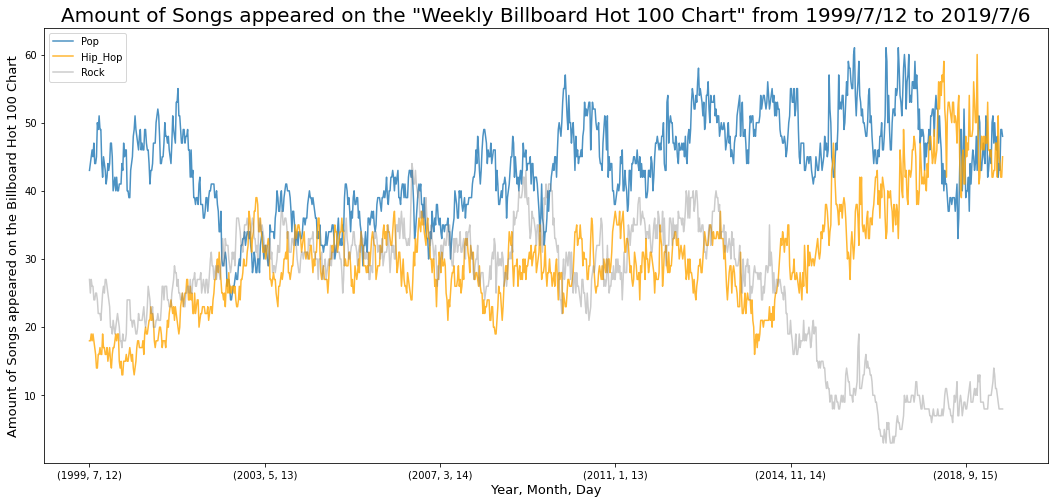

In [8]:
#Plot for Billboard 100 Chart
fig,ax = plt.subplots()
pd.DataFrame().assign(Pop=pop.groupby(["Year", "Month", "Day"]).count().get("Name")).plot(
    kind="line", figsize=(18,7), alpha=0.8, ax=ax)
pd.DataFrame().assign(Hip_Hop=hip_hop.groupby(["Year", "Month", "Day"]).count().get("Name")).plot(
    kind="line", figsize=(18,7), alpha=0.8, ax=ax, color="orange")
pd.DataFrame().assign(Rock=rock.groupby(["Year", "Month", "Day"]).count().get("Name")).plot(
    kind="line", figsize=(18,8), alpha=0.4, ax=ax, color="grey")
plt.title("Amount of Songs appeared on the \"Weekly Billboard Hot 100 Chart\" from 1999/7/12 to 2019/7/6", fontsize=20)
plt.ylabel("Amount of Songs appeared on the Billboard Hot 100 Chart", fontsize=13)
plt.xlabel("Year, Month, Day", fontsize=13)

Text(0.5, 0, 'Year, Month, Day')

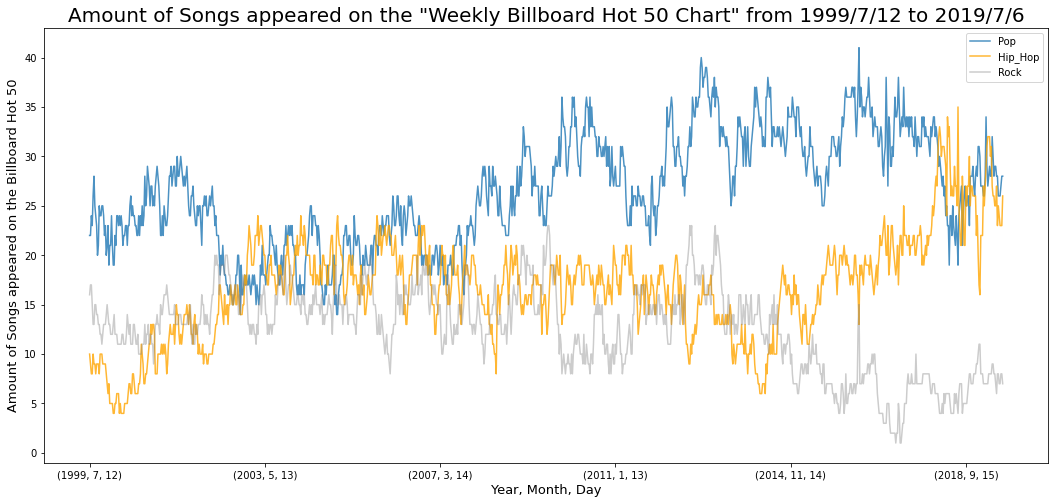

In [9]:
#Plot for Billboard 50 Chart
fig,ax = plt.subplots()
pd.DataFrame().assign(Pop=pop[pop.get("Weekly.rank") <= 50].groupby(["Year", "Month", "Day"]).count().get("Name")).plot(
    kind="line", figsize=(18,7), alpha=0.8, ax=ax,)
pd.DataFrame().assign(Hip_Hop=hip_hop[hip_hop.get("Weekly.rank") <= 50].groupby(["Year", "Month", "Day"]).count().get(
    "Name")).plot(kind="line", figsize=(18,7), alpha=0.8, ax=ax, color="orange")
pd.DataFrame().assign(Rock=rock[rock.get("Weekly.rank") <= 50].groupby(["Year", "Month", "Day"]).count().get("Name")).plot(
    kind="line", figsize=(18,8), alpha=0.4, ax=ax, color="grey")
plt.title("Amount of Songs appeared on the \"Weekly Billboard Hot 50 Chart\" from 1999/7/12 to 2019/7/6", fontsize=20)
plt.ylabel("Amount of Songs appeared on the Billboard Hot 50", fontsize=13)
plt.xlabel("Year, Month, Day", fontsize=13)